# Plotting CO Ice for the Filament

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import simple_norm
import astropy.units as u 
from astropy.coordinates import SkyCoord
import regions
from regions import Regions
from astropy.table import Table

from spectral_cube import SpectralCube
import importlib as imp
from icemodels.core import composition_to_molweight
#from brick2221.analysis.make_icecolumn_fig9 import dmag_tbl # 

from dust_extinction.averages import CT06_MWLoc, I05_MWAvg, CT06_MWGC, G21_MWAvg, RL85_MWGC, RRP89_MWGC, F11_MWGC

In [2]:
#from brick2221.analysis.make_icecolumn_fig9 import molscomps, compute_molecular_column
from brick2221.analysis.analysis_setup import basepath, molscomps, compute_molecular_column
dmag_tbl = Table.read(f'{basepath}/tables/combined_ice_absorption_tables.ecsv')
dmag_tbl.add_index('composition')

In [3]:
%cd ..
from jwst_plots import JWSTCatalog, make_cat_use, make_brick_cat
import cutout_manager as cm
import jwst_plots
import co_ice as co_map
imp.reload(co_map)
import extinction as ex
%cd notebooks

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament
/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [4]:
reg_f = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/filament_short.region')
reg_c1 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc1.region')
reg_c2 = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudc2.region')
reg_d = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/cloudd.region')

In [5]:
fn = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged_i2d.fits'
#fn = '/orange/adamginsburg/jwst/cloudc/images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d-perfilt64.fits'
hdu_405 = fits.open(fn)
data_405 = hdu_405[1].data
head_405 = hdu_405[1].header
blank_405 = np.zeros_like(data_405)*np.nan

## Catalog

In [6]:
cat_use = make_cat_use()

In [7]:
pos = SkyCoord('17:46:20.6290029866', '-28:37:49.5114204513', unit=(u.hour, u.deg))
l = 113.8*u.arcsec
w = 3.3*u.arcmin
reg = regions.RectangleSkyRegion(pos, width=l, height=w)

cutout_filament = cm.Cutout(pos, w, l)
cutout_405 = cutout_filament.get_cutout_405()

In [8]:
cat_filament = JWSTCatalog(cat_use.table_region_mask([reg], cutout_405.wcs))
#mask_red = (cat_filament.color('f182m', 'f410m') > 2) | (np.isnan(np.array(cat_filament.band('f182m'))) & np.isnan(np.array(cat_filament.band('f187n'))))
mask_red = (cat_filament.color('f182m', 'f212n') > 0.55) | (np.isnan(np.array(cat_filament.band('f182m'))) & np.isnan(np.array(cat_filament.band('f187n'))))
mask_red = mask_red & (cat_filament.color('f410m', 'f466n') < 0)
cat_filament = JWSTCatalog(cat_filament.catalog[mask_red])

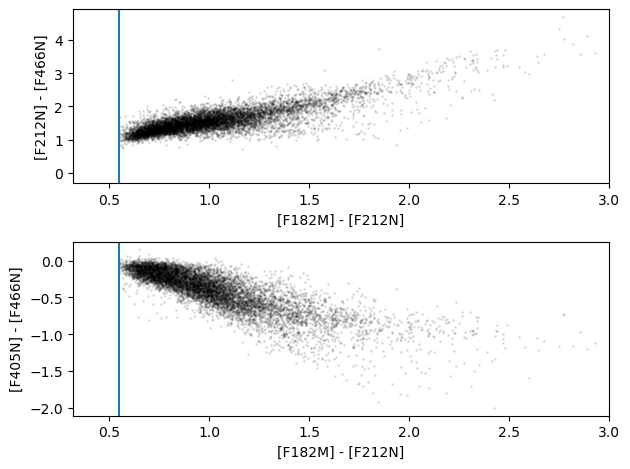

In [9]:
ax1 = plt.subplot(211)
cat_filament.plot_CCD('f182m', 'f212n', 'f212n', 'f466n', color='k', s=1, ax=ax1, alpha=0.1)
ax1.set_xlim(right=3)

ax2 = plt.subplot(212)
cat_filament.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='k', s=1, ax=ax2, alpha=0.1)
ax2.set_xlim(right=3)

ax1.axvline(0.55)
ax2.axvline(0.55)

plt.tight_layout()

In [10]:
#reg_f = Regions.read('/orange/adamginsburg/jwst/cloudc/lactea-filament/lactea-filament/regions_/filament_short.region')
cat_f = JWSTCatalog(cat_use.table_region_mask(reg_f, cutout_405.wcs))
mask_red = (cat_f.color('f182m', 'f212n') > 0.55) | (np.isnan(np.array(cat_f.band('f182m'))) & np.isnan(np.array(cat_f.band('f187n'))))
mask_red = mask_red & (cat_f.color('f410m', 'f466n') < 0)
cat_f = JWSTCatalog(cat_f.catalog[mask_red])

(0.0, 3.0)

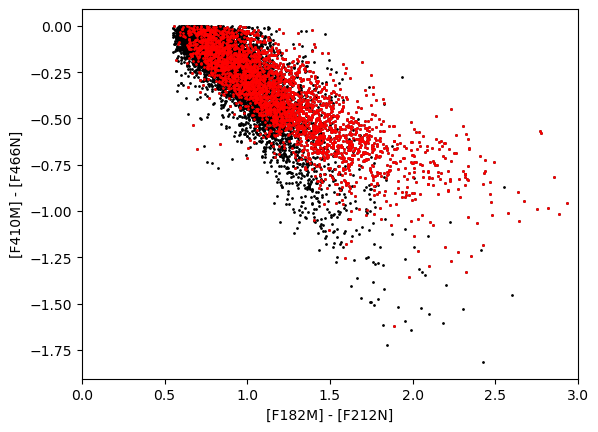

In [11]:
ax = plt.subplot(111)
cat_filament.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax, color='k', s=1)
cat_f.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax, color='r', s=1)
ax.set_xlim(0, 3)

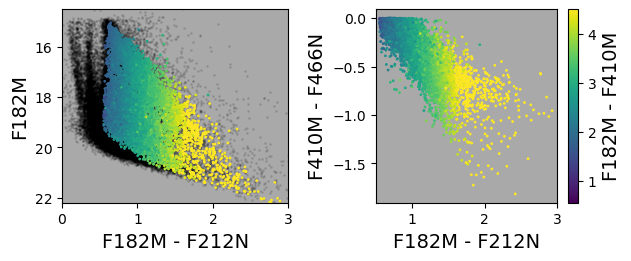

In [33]:
ax1 = plt.subplot(221)
ax1.set_facecolor('darkgrey')
cat_use.plot_CMD('f182m', 'f212n', 'f182m', color='k', s=1, ax=ax1, alpha=0.1)
cat_filament.plot_CMD('f182m', 'f212n', 'f182m', ax=ax1, s=1, cmap='viridis', c=cat_filament.color('f182m', 'f410m'), vmin=0.55, vmax=4.5)
plt.gca().invert_yaxis()
ax1.set_xlabel('F182M - F212N', fontsize=14)
ax1.set_ylabel('F182M', fontsize=14)
ax1.set_xlim(0, 3)
ax1.set_ylim(22.2, 14.5)

ax = plt.subplot(222)
ax.set_facecolor('darkgrey')
#cat_filament.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax, s=1, cmap='viridis', c=cat_filament.color('f182m', 'f212n'), vmin=0.5, vmax=3)
im = ax.scatter(cat_filament.color('f182m', 'f212n'), cat_filament.color('f410m', 'f466n'), s=1, c=cat_filament.color('f182m', 'f410m'), vmin=0.55, vmax=4.5, cmap='viridis')
ax.set_xlabel('F182M - F212N', fontsize=14)
ax.set_ylabel('F410M - F466N', fontsize=14)
ax.set_xlim(0.5, 3)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('F182M - F410M', fontsize=14)
plt.tight_layout()
plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/poster_filament_color_color.svg', dpi=300, bbox_inches='tight')

In [13]:
ridge_reg = [reg_d[0], reg_c1[0], reg_c2[0]]
cat_ridge = JWSTCatalog(cat_use.table_region_mask(ridge_reg, cutout_405.wcs))
mask_red = (cat_ridge.color('f182m', 'f212n') > 0.8) | (np.isnan(np.array(cat_ridge.band('f182m'))) & np.isnan(np.array(cat_ridge.band('f187n'))))
mask_red = mask_red & (cat_ridge.color('f410m', 'f466n') < 0)
cat_ridge = JWSTCatalog(cat_ridge.catalog[mask_red])

(0.5, 3.0)

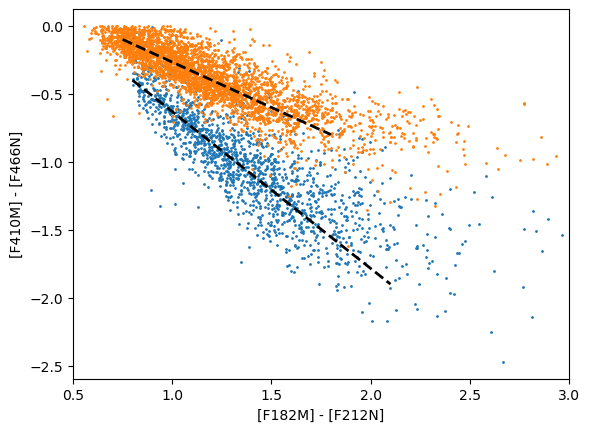

In [14]:
ax = plt.subplot(111)
cat_ridge.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax, s=1)
ax.plot([0.8, 2.1], [-0.4, -1.9], color='k', linestyle='--', label='dust ridge', lw=2)
cat_f.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax, s=1)
ax.plot([0.75, 1.8], [-0.1, -0.8], color='k', linestyle='--', label='filament', lw=2)

ax.set_xlim(0.5, 3)

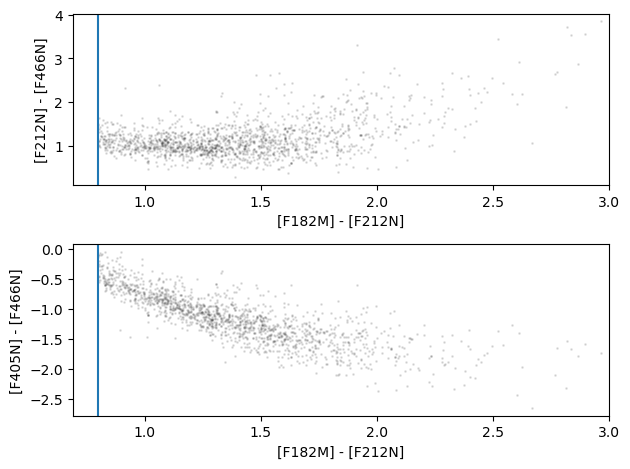

In [15]:
ax1 = plt.subplot(211)
cat_ridge.plot_CCD('f182m', 'f212n', 'f212n', 'f466n', color='k', s=1, ax=ax1, alpha=0.1)
ax1.set_xlim(right=3)

ax2 = plt.subplot(212)
cat_ridge.plot_CCD('f182m', 'f212n', 'f405n', 'f466n', color='k', s=1, ax=ax2, alpha=0.1)
ax2.set_xlim(right=3)

ax1.axvline(0.8)
ax2.axvline(0.8)

plt.tight_layout()

## CO Ice

In [16]:
Av_182212_filament = cat_filament.get_Av('f182m', 'f212n', ext=CT06_MWLoc())
Av_182212_ridge = cat_ridge.get_Av('f182m', 'f212n', ext=CT06_MWLoc())
Av_182212_f = cat_f.get_Av('f182m', 'f212n', ext=CT06_MWLoc())
#cat_filament.catalog['N(CO)'] = co_map.get_co_column(cat_filament, Av_182212, ref_band='f212n', ext=CT06_MWLoc(), consts_file='85_CO_(1)_10K_Hudgins.txt')

In [17]:
cat_filament.catalog['N(CO)'] = co_map.get_co_ice_column(cat_filament, Av_182212_filament, ext=CT06_MWLoc(), ref_band='f410m') # H2O:CO_(10:1)
cat_ridge.catalog['N(CO)'] = co_map.get_co_ice_column(cat_ridge, Av_182212_ridge, ext=CT06_MWGC(), ref_band='f410m') # H2O:CO_(10:1)
cat_f.catalog['N(CO)'] = co_map.get_co_ice_column(cat_f, Av_182212_f, ext=CT06_MWLoc(), ref_band='f410m') # H2O:CO_(10:1)

In [18]:
co_col_map = co_map.make_co_column_map(cat_filament, cat_filament.catalog['N(CO)'], cutout_405.wcs, cutout_405.shape, fwhm=30, k=5)

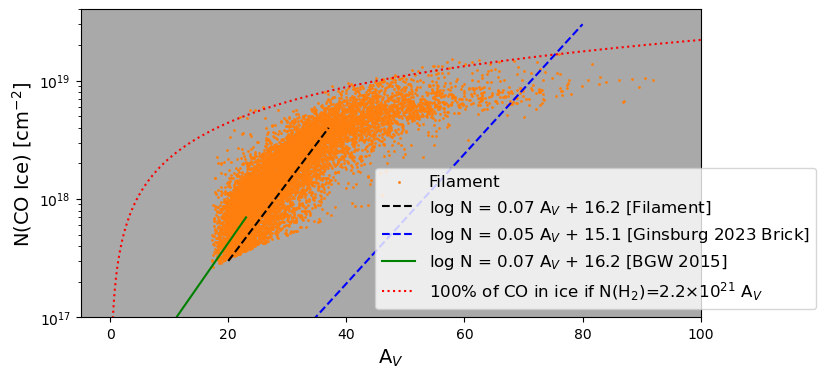

In [19]:
plt.figure(figsize=(8, 4))
ax = plt.subplot(111)
ax.set_facecolor('darkgrey')
# plt.scatter(Av_182212_filament, cat_filament.catalog['N(CO)'], color='k', s=1)
co_map.plot_Av_COice(Av_182212_filament, cat_filament.catalog['N(CO)'], extras=True, color='tab:orange', s=1, label='Filament')
#plt.scatter(Av_182212_ridge, cat_ridge.catalog['N(CO)'], color='tab:blue', s=1, label='Dust Ridge')
plt.yscale('log')
plt.xlabel('A$_V$', fontsize=14)
plt.ylabel('N(CO Ice) [cm$^{-2}$]', fontsize=14)
plt.xlim(right=100)
plt.ylim(1e17, 4e19)
pt1 = (20, 3e17)
pt2 = (37, 4e18)
#plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], label='Filament', color='k', linestyle='--')

plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.0), fontsize=12)
plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/poster_filament_Av_CO_ice.svg', dpi=300, bbox_inches='tight')

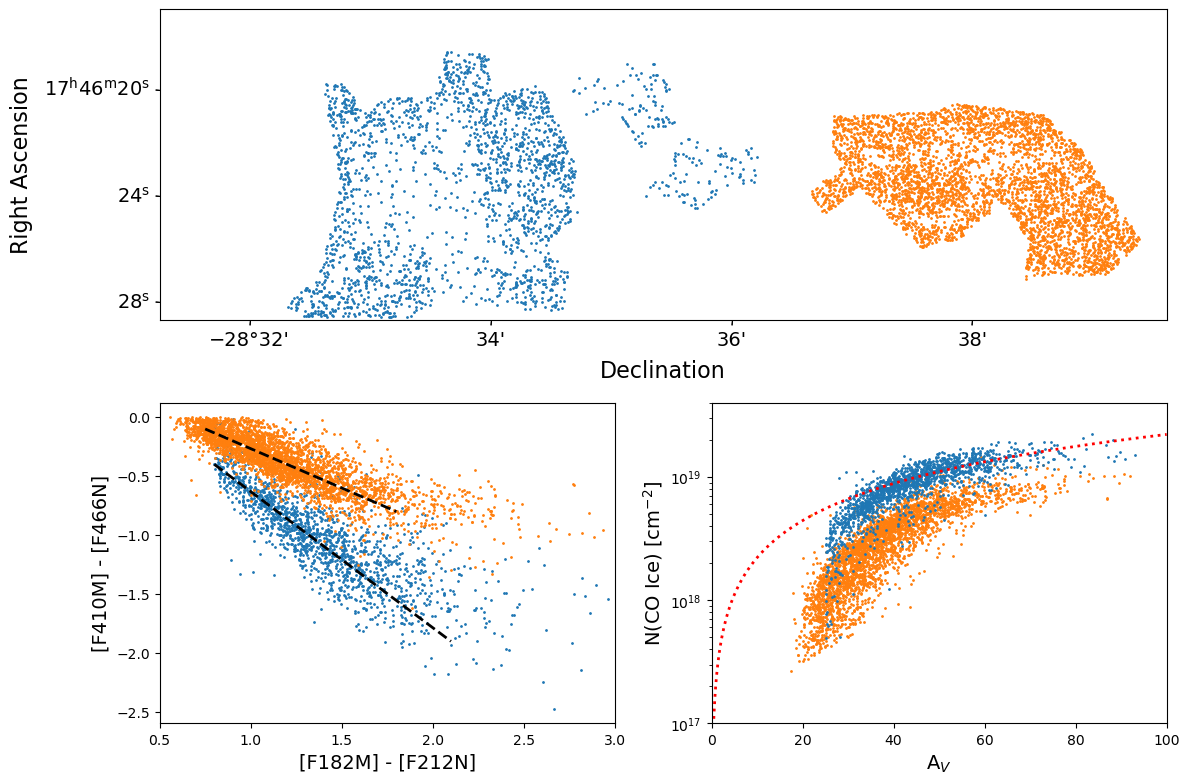

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(211, projection=WCS(head_405))
ax.imshow(blank_405)
cat_ridge.plot_position(ax=ax, transform=ax.get_transform('world'), s=1)
cat_f.plot_position(ax=ax, transform=ax.get_transform('world'), s=1)
dec = ax.coords[1]
ra = ax.coords[0]
dec.set_ticks_position('b')
dec.set_ticklabel_position('b')
dec.set_axislabel_position('b')
dec.set_ticklabel(size=14)
ra.set_ticks_position('l')
ra.set_ticklabel_position('l')
ra.set_axislabel_position('l')
ra.set_ticklabel(size=14)
ax.set_ylabel('Right Ascension', fontsize=16)
ax.set_xlabel('Declination', fontsize=16)

ax1 = plt.subplot(223)
cat_ridge.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax1, s=1)
cat_f.plot_CCD('f182m', 'f212n', 'f410m', 'f466n', ax=ax1, s=1)
ax1.set_xlim(0.5, 3)
ax1.plot([0.8, 2.1], [-0.4, -1.9], color='k', linestyle='--', label='dust ridge', lw=2)
ax1.plot([0.75, 1.8], [-0.1, -0.8], color='k', linestyle='--', label='filament', lw=2)
ax1.set_xlabel('[F182M] - [F212N]', fontsize=14)
ax1.set_ylabel('[F410M] - [F466N]', fontsize=14)

ax2 = plt.subplot(224)
ax2.scatter(Av_182212_f, cat_f.catalog['N(CO)'], color='tab:orange', s=1, label='Filament')
ax2.scatter(Av_182212_ridge, cat_ridge.catalog['N(CO)'], color='tab:blue', s=1, label='Dust Ridge')
ax2.set_yscale('log')
ax2.set_xlabel('A$_V$', fontsize=14)
ax2.set_ylabel('N(CO Ice) [cm$^{-2}$]', fontsize=14)
ax2.set_xlim(0, 100)
ax2.set_ylim(1e17, 4e19)
pt1 = (20, 3e17)
pt2 = (37, 4e18)
NCOofAV = 2.21e21 * np.linspace(0.1, 100, 1000) * 1e-4
ax2.plot(np.linspace(0.1, 100, 1000), NCOofAV, lw=2,
            label='100% of CO in ice if N(H$_2$)=2.2$\\times10^{21}$ A$_V$', color='r', linestyle=':')

#plt.legend(loc='lower right', bbox_to_anchor=(1.2, 0.0), fontsize=12)

plt.tight_layout()
plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/poster_spatial_CO_ice.svg', dpi=300, bbox_inches='tight')

In [21]:
# Define the physical size and distance
L = 0.5 * u.pc  # physical size in parsecs
D = 5 * u.kpc   # distance in kiloparsecs

# Calculate the angular size in radians
theta_rad = (L / D).to(u.radian, equivalencies=u.dimensionless_angles())

# Convert the angular size to arcseconds
theta_arcsec = theta_rad.to(u.arcsec)

In [23]:
from astropy.visualization.wcsaxes import add_scalebar


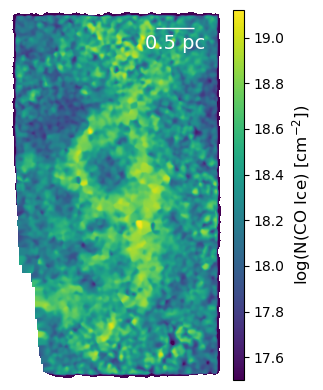

In [24]:
fig = plt.figure(figsize=(8, 4))
co_col_map[co_col_map < 1e16] = np.nan
ax = plt.subplot(projection=cutout_405.wcs)
im = ax.imshow(np.log10(co_col_map), origin='lower', cmap='viridis', vmin=17.5)#, vmin=20, vmax=21)
#plt.colorbar(im, ax=ax, label='log(N(CO) [cm$^{-2}$])')
cbax = ax.inset_axes([1.05, 0.0, 0.05, 1])  
cbar = plt.colorbar(mappable=im, cax=cbax)
cbar.set_label("log(N(CO Ice) [cm$^{-2}$])", fontsize=12)
ax.set_xlabel('Right Ascension', fontsize=10)
ax.set_ylabel('Declination', fontsize=10)
ax.set_axis_off()
plt.tight_layout()
add_scalebar(ax, theta_arcsec, color='white', label='0.5 pc', corner='top right', fontproperties={"size": 14})
plt.savefig('/orange/adamginsburg/jwst/cloudc/figures/poster_co_ice_column_map.svg', dpi=300, bbox_inches='tight')